In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import date
from datetime import datetime

%matplotlib inline

In [2]:
player_prof = pd.read_csv('../data/player-profiles.csv')
player_prof.head(2)

,Unnamed: 0,Event Name,Month,Year,EventRating,Place,Strokes,Cash,State,Country,Division,Tier,Tour,Event Date,Player Name
0,0,(DGPT Silver) The New World Championship prese...,Nov,2022,1029.0,6,181,900.0,Florida,USA,MPO,A,DGPT-Silver,2022-11-11,Ezra Aderhold
1,1,Knowledge Management presents the Lake Marshal...,Oct,2022,1028.0,6,199,1000.0,Virginia,USA,MPO,A,DGPT-Silver,2022-10-28,Ezra Aderhold


In [3]:
ratings = player_prof[['Player Name', 'EventRating']]
ratings.columns = ['Player Name', 'Rating']
ratings

,Player Name,Rating
0,Ezra Aderhold,1029.0
1,Ezra Aderhold,1028.0
2,Ezra Aderhold,1005.0
3,Ezra Aderhold,1033.0
4,Ezra Aderhold,1026.0
...,...,...
26377,Ricky Wysocki,967.0
26378,Ricky Wysocki,965.0
26379,Ricky Wysocki,970.0
26380,Ricky Wysocki,991.0


In [4]:
top_20 = ratings.groupby('Player Name', as_index=False)['Rating'].mean()
top_20 = top_20.sort_values('Rating', ascending=False)
top_20 = top_20.reset_index()
top_20.head(20)

,index,Player Name,Rating
0,88,Paul McBeth,1039.736842
1,93,Ricky Wysocki,1034.947075
2,45,Gannon Buhr,1033.851064
3,66,Kyle Klein,1032.413333
4,62,Ken Climo,1031.456432
5,27,Chris Dickerson,1030.596610
6,39,Eagle McMahon,1029.005618
7,84,Nikko Locastro,1028.772936
8,99,Simon Lizotte,1028.319635
9,12,Barry Schultz,1025.807611


In [5]:
top_20 = top_20.drop('index', axis=1)
top_20.head(1)

,Player Name,Rating
0,Paul McBeth,1039.736842


In [6]:
top_20.head(20)

,Player Name,Rating
0,Paul McBeth,1039.736842
1,Ricky Wysocki,1034.947075
2,Gannon Buhr,1033.851064
3,Kyle Klein,1032.413333
4,Ken Climo,1031.456432
5,Chris Dickerson,1030.596610
6,Eagle McMahon,1029.005618
7,Nikko Locastro,1028.772936
8,Simon Lizotte,1028.319635
9,Barry Schultz,1025.807611


In [7]:
top_20.index = top_20.index + 1
top_20_chart = top_20.head(20)


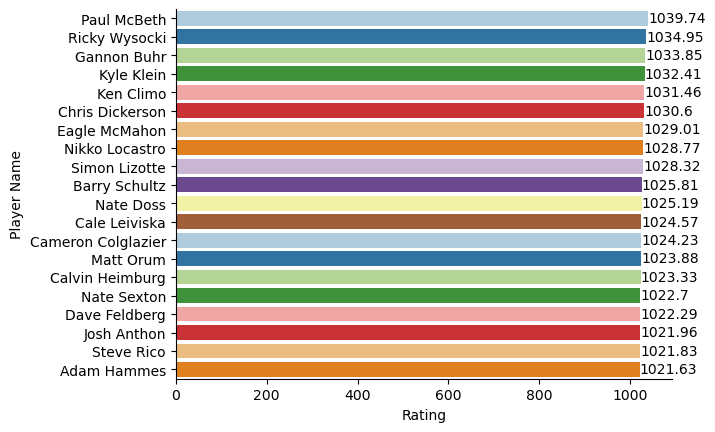

In [8]:
ax = sns.barplot(data=top_20_chart,
            x='Rating',
            y='Player Name',
            palette='Paired')
sns.despine(top=True, right=True, )

for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('../assets/top-20-chart.png')

In [9]:
d = {'Player Name': ['Ricky Wysocki',
                     'Paul McBeth',
                     'Calvin Heimburg',
                     'Gannon Buhr',
                     'Chris Dickerson',
                     'Joel Freeman',
                     'Matthew Orum',
                     'Kyle Klein',
                     'Isaac Robinson',
                     'Simon Lizotte',
                     'Chris Clemons',
                     'Corey Ellis',
                     'James Conrad',
                     'Kevin Jones',
                     'Anthony Barela',
                     'Aaron Gossage',
                     'Drew Gibson',
                     'Nathan Sexton',
                     'Ezra Aderhold',
                     'Mason Ford']}
dgpt_top_20 = pd.DataFrame(data=d)
dgpt_top_20

,Player Name
0,Ricky Wysocki
1,Paul McBeth
2,Calvin Heimburg
3,Gannon Buhr
4,Chris Dickerson
5,Joel Freeman
6,Matthew Orum
7,Kyle Klein
8,Isaac Robinson
9,Simon Lizotte


In [10]:
dgpt_top_20.index = dgpt_top_20.index + 1
dgpt_top_20

,Player Name
1,Ricky Wysocki
2,Paul McBeth
3,Calvin Heimburg
4,Gannon Buhr
5,Chris Dickerson
6,Joel Freeman
7,Matthew Orum
8,Kyle Klein
9,Isaac Robinson
10,Simon Lizotte


In [11]:
dgpt_top_20 =pd.merge(dgpt_top_20, top_20[['Player Name', 'Rating']], how='inner' )
dgpt_top_20

,Player Name,Rating
0,Ricky Wysocki,1034.947075
1,Paul McBeth,1039.736842
2,Calvin Heimburg,1023.330275
3,Gannon Buhr,1033.851064
4,Chris Dickerson,1030.596610
5,Joel Freeman,1018.413978
6,Kyle Klein,1032.413333
7,Isaac Robinson,1011.466667
8,Simon Lizotte,1028.319635
9,Chris Clemons,1014.931217


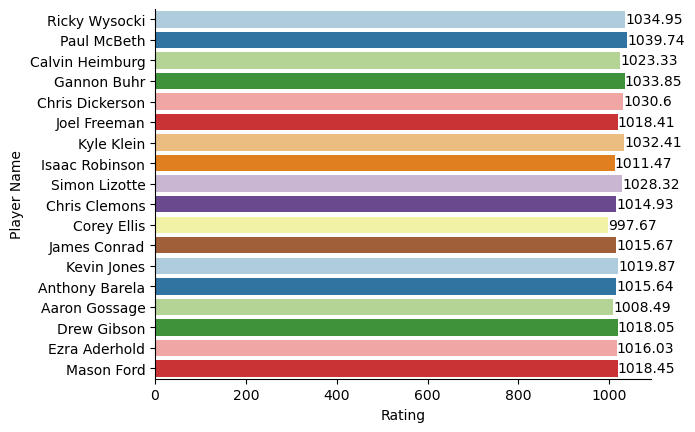

In [12]:
ax = sns.barplot(data=dgpt_top_20,
            x='Rating',
            y='Player Name',
            palette='Paired')
sns.despine(top=True, right=True, )

for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('../assets/dgpt-top-20-chart.png')

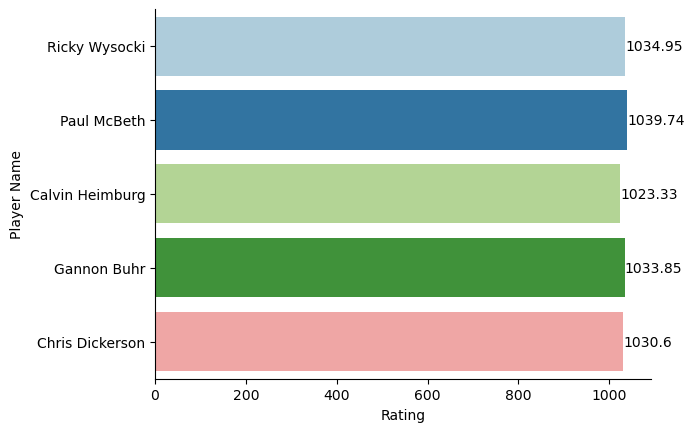

In [13]:
top_5 = dgpt_top_20.head(5)

ax = sns.barplot(data=top_5,
            x='Rating',
            y='Player Name',
            palette='Paired')
sns.despine(top=True, right=True, )

for i in ax.containers:
    ax.bar_label(i,)
    
plt.savefig('../assets/top-5-chart.png')

In [14]:
##convert to list to iterate through
# loop_list = dgpt_top_20.values.tolist()
# loop_list

In [15]:
# top_20_ratings = pd.DataFrame()

# for i, x in top_20.iterrows():
#     top_20['Player Name'] = top_20_ratings[i]
#     if x == loop_list[i]:
#         top_20_ratings.append(x)
    

In [16]:
tour = pd.read_csv('../data/tourney_results_comp.csv')
tour.head(2)

,Unnamed: 0,Place,Points,Name,PDGA#,Rating,Par,Rd1,Rd2,Rd3,Rd4,Finals,Total,Prize,Event Name
0,0,1,1180.0,Drew Gibson,48346,1035,-39,52.0,48.0,53.0,NaN,48.0,201,"$6,000",Las Vegas Challenge
1,1,2,1170.0,Gannon Buhr,75412,1027,-39,47.0,52.0,51.0,NaN,51.0,201,"$3,500",Las Vegas Challenge


In [17]:
tour = tour.drop('Unnamed: 0', axis=1)
tour.head(1)

,Place,Points,Name,PDGA#,Rating,Par,Rd1,Rd2,Rd3,Rd4,Finals,Total,Prize,Event Name
0,1,1180.0,Drew Gibson,48346,1035,-39,52.0,48.0,53.0,NaN,48.0,201,"$6,000",Las Vegas Challenge


In [18]:
gannon = tour.loc[tour['Name'] == 'Gannon Buhr']
ricky = tour.loc[tour['Name'] == 'Ricky Wysocki']
paul = tour.loc[tour['Name'] == 'Paul McBeth']
calvin = tour.loc[tour['Name'] == 'Calvin Heimburg']
chris = tour.loc[tour['Name'] == 'Chris Dickerson']

In [19]:
chris

,Place,Points,Name,PDGA#,Rating,Par,Rd1,Rd2,Rd3,Rd4,Finals,Total,Prize,Event Name
14,12,1070.0,Chris Dickerson,62467,1045,-30,46.0,55.0,57.0,NaN,52.0,210,$925,Las Vegas Challenge
126,5,1160.0,Chris Dickerson,62467,1043,-16,59.0,52.0,62.0,NaN,NaN,173,"$1,520",Waco Annual Charity Open
246,8,1240.0,Chris Dickerson,62467,1043,-15,56.0,57.0,61.0,NaN,NaN,174,"$1,317",27th Annual Texas State
372,4,1160.0,Chris Dickerson,62467,1046,-23,57.0,58.0,54.0,NaN,NaN,169,"$2,500",Jonesboro Open
495,8,1100.0,Chris Dickerson,62467,1046,-1,68.0,66.0,65.0,NaN,60.0,259,"$1,375",Dynamic Discs Open
951,2,990.0,Chris Dickerson,62467,1044,-29,63.0,57.0,58.0,NaN,NaN,178,"$5,800",LWS Open at Idlewild
1062,12,1050.0,Chris Dickerson,62467,1044,-15,59.0,59.0,59.0,NaN,NaN,177,"$1,417",Discraft Great Lakes Open
1184,19,1300.0,Chris Dickerson,62467,1044,-8,64.0,63.0,67.0,NaN,60.0,254,"$1,250",Discraft Ledgestone Open
1331,16,1050.0,Chris Dickerson,62467,1044,-17,60.0,57.0,58.0,NaN,NaN,175,"$1,090",The TruBank Des Moines Challenge
1437,2,950.0,Chris Dickerson,62467,1043,-31,52.0,55.0,49.0,NaN,61.0,217,"$5,750",Discraft's Green Mountain Championship


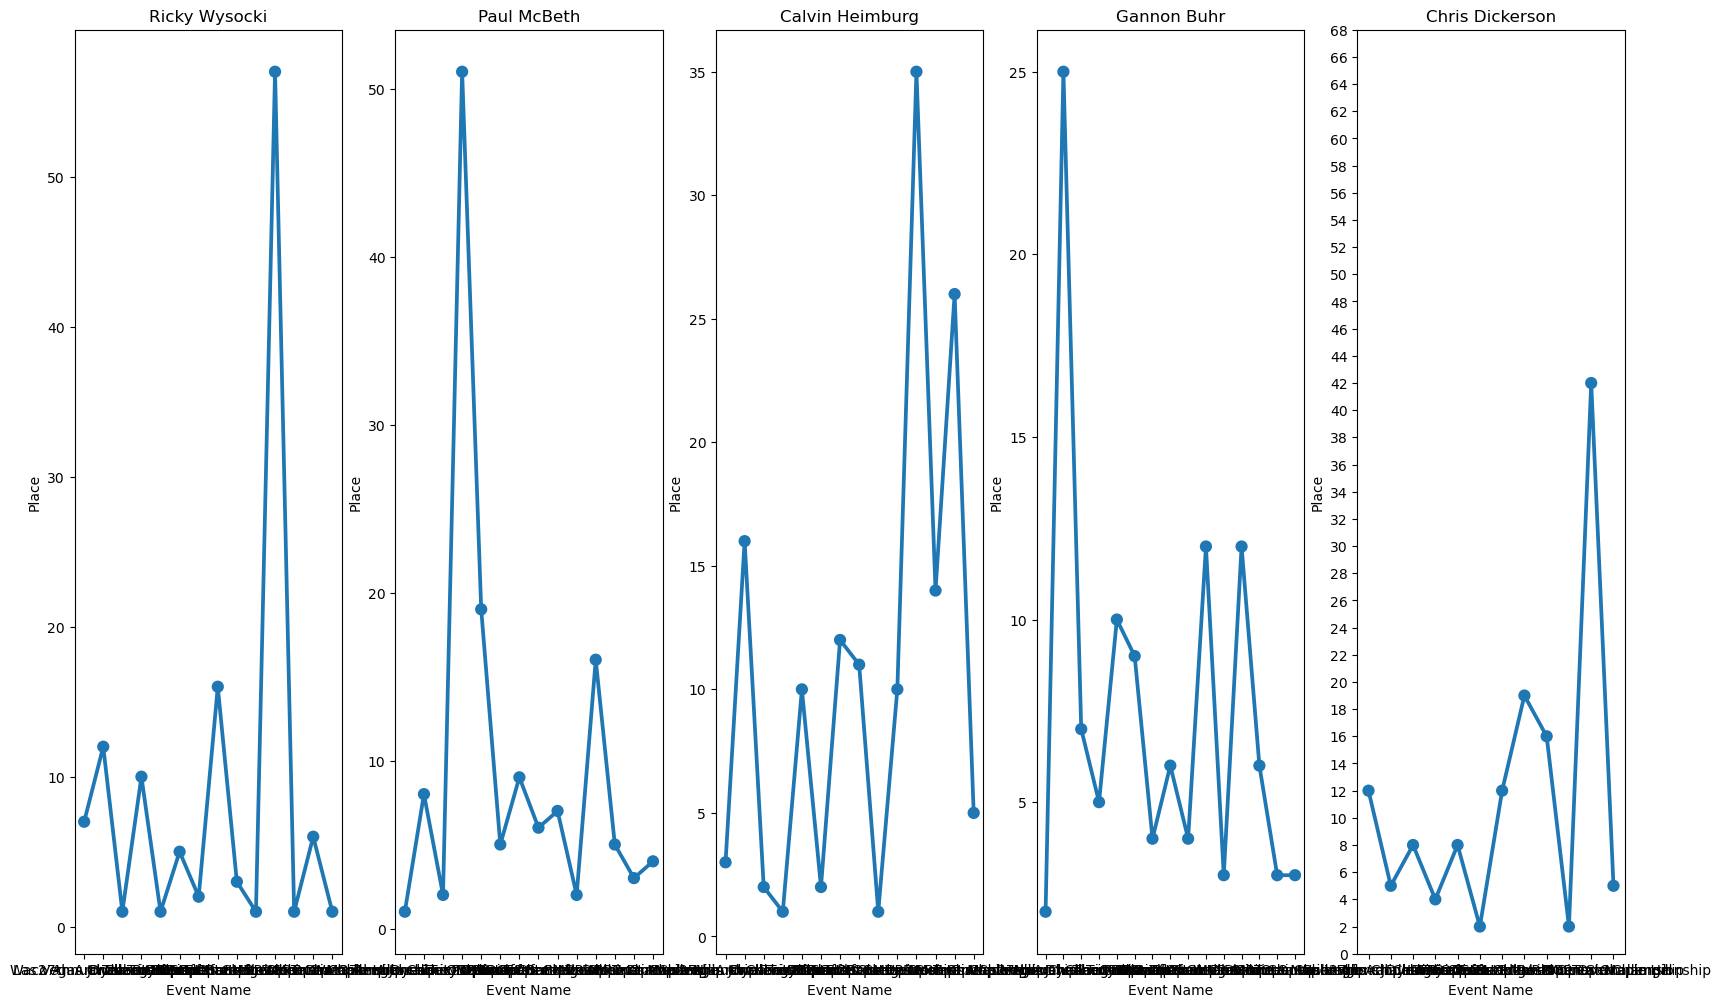

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,12))

sns.pointplot(data=ricky, x='Event Name', y='Place', ax=ax[0])
ax[0].set_title('Ricky Wysocki')

sns.pointplot(data=paul, x='Event Name', y='Place', ax=ax[1])
ax[1].set_title('Paul McBeth')
sns.pointplot(data=calvin, x='Event Name', y='Place', ax=ax[2])
ax[2].set_title('Calvin Heimburg')
sns.pointplot(data=gannon, x='Event Name', y='Place', ax=ax[3])
ax[3].set_title('Gannon Buhr')
sns.pointplot(data=chris, x='Event Name', y='Place', ax=ax[4])
ax[4].set_title('Chris Dickerson')
yticks = np.arange(0, 70, 5)
plt.yticks(yticks);

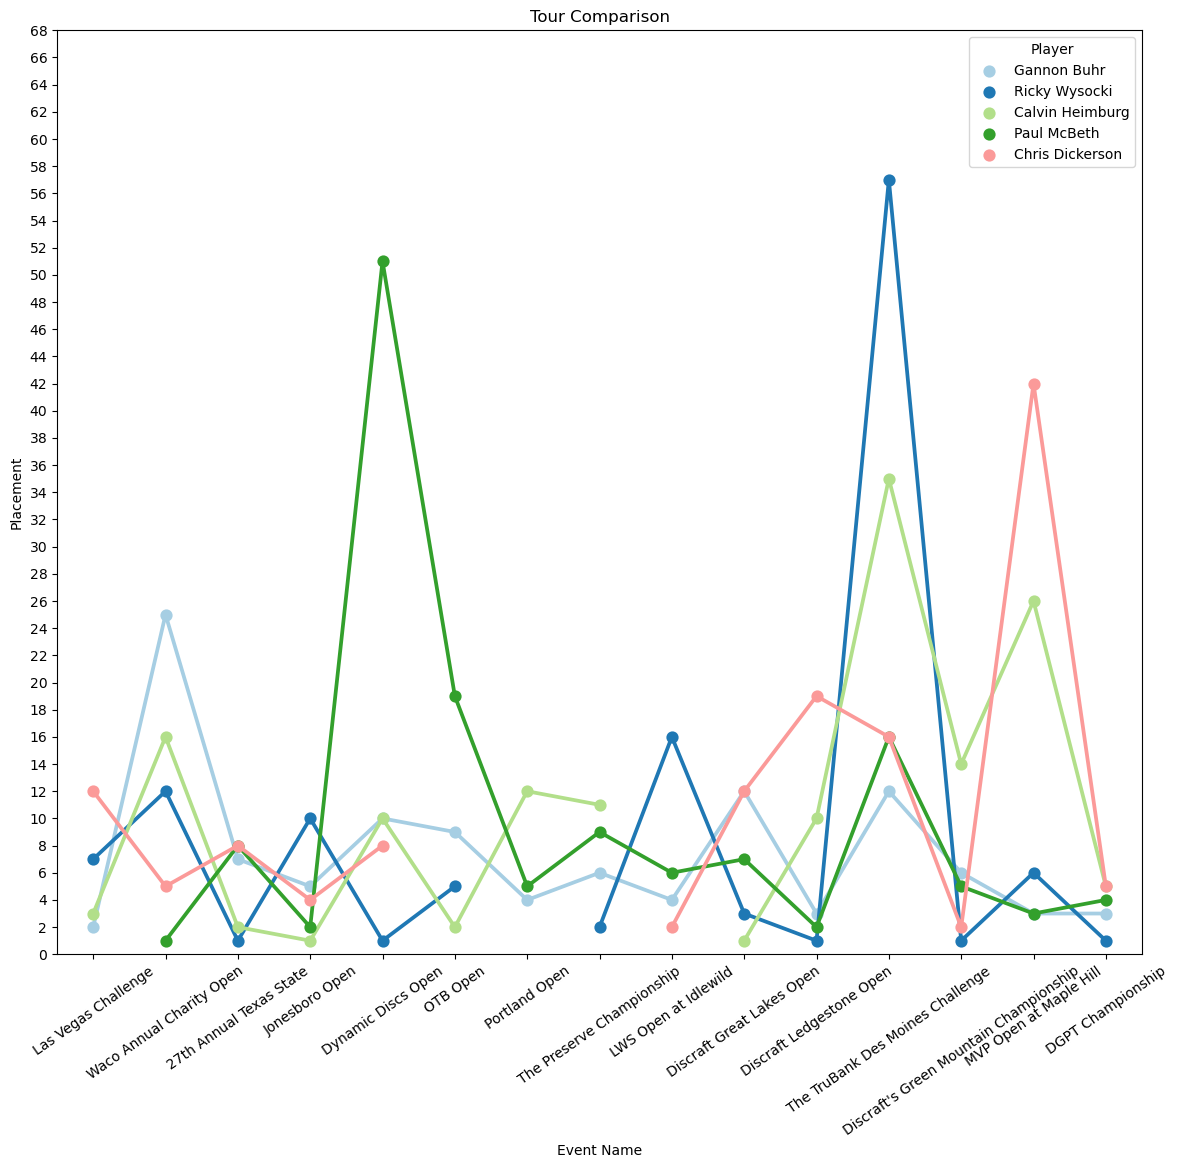

In [22]:
gan = pd.DataFrame({'x':["Las Vegas Challenge",
                         "Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "OTB Open",
                         "Portland Open",
                         "The Preserve Championship",
                         "LWS Open at Idlewild",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                    'y':[2,25,7,5,10,9,4,6,4,12,3,12,6,3,3],})

rick = pd.DataFrame({'x':["Las Vegas Challenge",
                         "Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "OTB Open",
                         "The Preserve Championship",
                         "LWS Open at Idlewild",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                     'y':[7,12,1,10,1,5,2,16,3,1,57,1,6,1]})

calv = pd.DataFrame({'x':["Las Vegas Challenge",
                         "Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "OTB Open",
                         "Portland Open",
                         "The Preserve Championship",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                      'y':[3,16,2,1,10,2,12,11,1,10,35,14,26,5]})

pau = pd.DataFrame({'x':["Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "OTB Open",
                         "Portland Open",
                         "The Preserve Championship",
                         "LWS Open at Idlewild",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                    'y':[1,8,2,51,19,5,9,6,7,2,16,5,3,4],})

chr = pd.DataFrame({'x':["Las Vegas Challenge",
                         "Waco Annual Charity Open",
                         "27th Annual Texas State",
                         "Jonesboro Open",
                         "Dynamic Discs Open",
                         "LWS Open at Idlewild",
                         "Discraft Great Lakes Open",
                         "Discraft Ledgestone Open",
                         "The TruBank Des Moines Challenge",
                         "Discraft's Green Mountain Championship",
                         "MVP Open at Maple Hill",
                         "DGPT Championship"],
                    'y':[12,5,8,4,8,2,12,19,16,2,42,5]})

yticks = np.arange(0, 70, 2) ##sets y ticks. parameters = (start, stop, step)

gan['Player'] = 'Gannon Buhr'
rick['Player'] = 'Ricky Wysocki'
calv['Player'] = 'Calvin Heimburg'
pau['Player'] = 'Paul McBeth'
chr['Player'] = 'Chris Dickerson'
res=pd.concat([gan,rick,calv,pau,chr])
#sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(14,12))
sns.pointplot(x='x', y='y', data=res, hue='Player', palette='Paired', ax=ax)
#plt.grid(axis='both')
plt.xlabel('Event Name')
plt.ylabel('Placement')
plt.ylim(0, 60)
plt.yticks(yticks)
plt.xticks(rotation = 35)
plt.title('Tour Comparison')
plt.savefig('../assets/tour-comp.png')
plt.show()

In [49]:
grid = tour.loc[(tour['Name']=='Gannon Buhr')|(tour['Name']=='Ricky Wysocki')|(tour['Name']=='Paul McBeth')|(tour['Name']=='Calvin Heimburg')|(tour['Name']=='Chris Dickerson')]
grid

,Place,Points,Name,PDGA#,Rating,Par,Rd1,Rd2,Rd3,Rd4,Finals,Total,Prize,Event Name
1,2,1170.0,Gannon Buhr,75412,1027,-39,47.0,52.0,51.0,NaN,51.0,201,"$3,500",Las Vegas Challenge
2,3,1160.0,Calvin Heimburg,45971,1047,-36,48.0,51.0,57.0,NaN,48.0,204,"$2,700",Las Vegas Challenge
8,7,1120.0,Ricky Wysocki,38008,1054,-32,48.0,55.0,51.0,NaN,54.0,208,"$1,400",Las Vegas Challenge
14,12,1070.0,Chris Dickerson,62467,1045,-30,46.0,55.0,57.0,NaN,52.0,210,$925,Las Vegas Challenge
118,1,1200.0,Paul McBeth,27523,1050,-23,55.0,54.0,57.0,NaN,NaN,166,"$7,500",Waco Annual Charity Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,1,320.0,Ricky Wysocki,38008,1047,NaN,NaN,NaN,56.0,57.0,NaN,NaN,"$35,000",DGPT Championship
1614,3,300.0,Gannon Buhr,75412,1043,NaN,NaN,NaN,57.0,58.0,NaN,NaN,"$14,000",DGPT Championship
1615,4,290.0,Paul McBeth,27523,1049,NaN,NaN,NaN,55.0,63.0,NaN,NaN,"$9,000",DGPT Championship
1619,5,280.0,Calvin Heimburg,45971,1041,NaN,NaN,NaN,59.0,NaN,NaN,NaN,"$5,500",DGPT Championship


In [51]:
avg_place = grid.groupby('Name', as_index=False)['Place'].mean()
avg_place


,Name,Place
0,Calvin Heimburg,10.571429
1,Chris Dickerson,11.250000
2,Gannon Buhr,7.400000
3,Paul McBeth,9.857143
4,Ricky Wysocki,8.785714


In [67]:
podiums = grid.sort_values(by='Place', ascending=True)
podiums = podiums.head(22)
podiums = podiums['Name'].value_counts()
podiums = pd.DataFrame(podiums)
podiums.reset_index(inplace=True)
podiums

,index,Name
0,Ricky Wysocki,7
1,Calvin Heimburg,5
2,Paul McBeth,4
3,Gannon Buhr,4
4,Chris Dickerson,2


In [68]:
podiums.rename(columns = {'index':'Player', 'Name':'Podium Finishes'}, inplace = True)
podiums

,Player,Podium Finishes
0,Ricky Wysocki,7
1,Calvin Heimburg,5
2,Paul McBeth,4
3,Gannon Buhr,4
4,Chris Dickerson,2


In [79]:
top10 = grid.sort_values(by='Place', ascending=True)
top10 = top10.head(49)
top10 = top10['Name'].value_counts()
top10 = pd.DataFrame(top10)
top10.reset_index(inplace=True)
top10.rename(columns = {'index':'Player', 'Name':'Top 10 Finishes'}, inplace = True)
top10

,Player,Top 10 Finishes
0,Gannon Buhr,12
1,Paul McBeth,11
2,Ricky Wysocki,11
3,Calvin Heimburg,8
4,Chris Dickerson,7


In [84]:
wins = grid.sort_values(by='Place', ascending=True)
wins = wins.head(8)
wins = wins['Name'].value_counts()
wins = pd.DataFrame(wins)
wins.reset_index(inplace=True)
wins.rename(columns = {'index':'Player', 'Name':'Wins'}, inplace = True)
wins

,Player,Wins
0,Ricky Wysocki,5
1,Calvin Heimburg,2
2,Paul McBeth,1
